In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
print(lat_lngs)

In [10]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy


In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

615

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
#print(url)


# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | swift current
Processing Record 3 of Set 1 | barrow
Processing Record 4 of Set 1 | san patricio
Processing Record 5 of Set 1 | port alfred
Processing Record 6 of Set 1 | faya
Processing Record 7 of Set 1 | noumea
Processing Record 8 of Set 1 | east london
Processing Record 9 of Set 1 | bethel
Processing Record 10 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 11 of Set 1 | nelson bay
Processing Record 12 of Set 1 | toliary
City not found. Skipping...
Processing Record 13 of Set 1 | saleaula
City not found. Skipping...
Processing Record 14 of Set 1 | bari
Processing Record 15 of Set 1 | tautira
Processing Record 16 of Set 1 | yellowknife
Processing Record 17 of Set 1 | kodiak
Processing Record 18 of Set 1 | manokwari
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | hobart
Processing Record 21 of Set 1 | punta aren

Processing Record 38 of Set 4 | lorengau
Processing Record 39 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 40 of Set 4 | imbituba
Processing Record 41 of Set 4 | pijijiapan
Processing Record 42 of Set 4 | gogrial
Processing Record 43 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 44 of Set 4 | saint-philippe
Processing Record 45 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 46 of Set 4 | mecca
Processing Record 47 of Set 4 | taksimo
Processing Record 48 of Set 4 | homagama
Processing Record 49 of Set 4 | talnakh
Processing Record 50 of Set 4 | flinders
Processing Record 1 of Set 5 | grand gaube
Processing Record 2 of Set 5 | linqing
Processing Record 3 of Set 5 | lethem
Processing Record 4 of Set 5 | lamesa
Processing Record 5 of Set 5 | thana
Processing Record 6 of Set 5 | dongkan
Processing Record 7 of Set 5 | maloh
Processing Record 8 of Set 5 | nizhneyansk
City not found. Skipping...
Processing Record 9

Processing Record 28 of Set 8 | xuddur
Processing Record 29 of Set 8 | warsaw
Processing Record 30 of Set 8 | hunza
City not found. Skipping...
Processing Record 31 of Set 8 | del rio
Processing Record 32 of Set 8 | ilebo
Processing Record 33 of Set 8 | saskylakh
Processing Record 34 of Set 8 | port-cartier
Processing Record 35 of Set 8 | san jose
Processing Record 36 of Set 8 | touros
Processing Record 37 of Set 8 | hami
Processing Record 38 of Set 8 | olafsvik
Processing Record 39 of Set 8 | oussouye
Processing Record 40 of Set 8 | kuching
Processing Record 41 of Set 8 | shimoda
Processing Record 42 of Set 8 | morro bay
Processing Record 43 of Set 8 | cortez
Processing Record 44 of Set 8 | lata
Processing Record 45 of Set 8 | maneadero
Processing Record 46 of Set 8 | borovoy
Processing Record 47 of Set 8 | buri
Processing Record 48 of Set 8 | kropotkin
Processing Record 49 of Set 8 | jalor
Processing Record 50 of Set 8 | loandjili
Processing Record 1 of Set 9 | coahuayana
Processing 

Processing Record 20 of Set 12 | umm kaddadah
Processing Record 21 of Set 12 | ferme-neuve
Processing Record 22 of Set 12 | san onofre
Processing Record 23 of Set 12 | honiara
Processing Record 24 of Set 12 | ezequiel montes
Processing Record 25 of Set 12 | luganville
Processing Record 26 of Set 12 | praia da vitoria
Processing Record 27 of Set 12 | acuna
City not found. Skipping...
Processing Record 28 of Set 12 | lompoc
Processing Record 29 of Set 12 | lodja
Processing Record 30 of Set 12 | asosa
Processing Record 31 of Set 12 | saint-pierre
Processing Record 32 of Set 12 | atikokan
Processing Record 33 of Set 12 | mentok
City not found. Skipping...
Processing Record 34 of Set 12 | lere
Processing Record 35 of Set 12 | kungurtug
Processing Record 36 of Set 12 | jatiroto
Processing Record 37 of Set 12 | altay
Processing Record 38 of Set 12 | linxia
Processing Record 39 of Set 12 | itaueira
Processing Record 40 of Set 12 | oktyabrskiy
Processing Record 41 of Set 12 | half moon bay
Proc

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,40.66,81,40,21.85,AR,2022-04-29 01:25:11
1,Swift Current,50.2834,-107.8014,56.21,28,0,10.36,CA,2022-04-29 01:24:49
2,Barrow,71.2906,-156.7887,8.62,78,100,19.57,US,2022-04-29 01:25:12
3,San Patricio,28.0170,-97.5169,77.90,77,30,14.65,US,2022-04-29 01:23:58
4,Port Alfred,-33.5906,26.8910,66.34,53,4,8.43,ZA,2022-04-29 01:15:52
5,Faya,18.3851,42.4509,57.31,60,0,5.06,SA,2022-04-29 01:25:13
6,Noumea,-22.2763,166.4572,75.99,99,100,19.84,NC,2022-04-29 01:21:10
7,East London,-33.0153,27.9116,68.14,45,0,8.93,ZA,2022-04-29 01:14:34
8,Bethel,41.3712,-73.4140,48.49,35,0,9.22,US,2022-04-29 01:13:59
9,Nelson Bay,-32.7167,152.1500,75.09,78,94,1.23,AU,2022-04-29 01:15:51


In [9]:
new_column_order = ["City", "Country", "Date", "Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)



,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2022-04-29 01:25:11,-54.8000,-68.3000,40.66,81,40,21.85
1,Swift Current,CA,2022-04-29 01:24:49,50.2834,-107.8014,56.21,28,0,10.36
2,Barrow,US,2022-04-29 01:25:12,71.2906,-156.7887,8.62,78,100,19.57
3,San Patricio,US,2022-04-29 01:23:58,28.0170,-97.5169,77.90,77,30,14.65
4,Port Alfred,ZA,2022-04-29 01:15:52,-33.5906,26.8910,66.34,53,4,8.43
5,Faya,SA,2022-04-29 01:25:13,18.3851,42.4509,57.31,60,0,5.06
6,Noumea,NC,2022-04-29 01:21:10,-22.2763,166.4572,75.99,99,100,19.84
7,East London,ZA,2022-04-29 01:14:34,-33.0153,27.9116,68.14,45,0,8.93
8,Bethel,US,2022-04-29 01:13:59,41.3712,-73.4140,48.49,35,0,9.22
9,Nelson Bay,AU,2022-04-29 01:15:51,-32.7167,152.1500,75.09,78,94,1.23


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

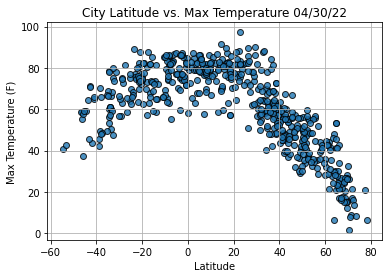

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

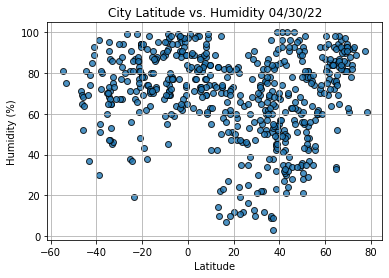

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

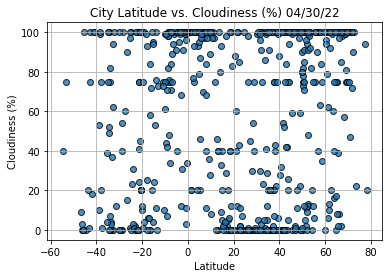

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

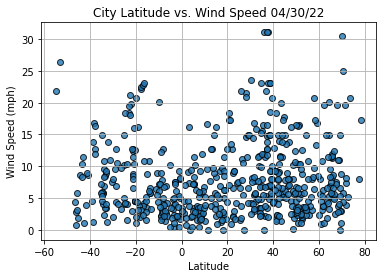

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [46]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    

In [47]:
index13 = city_data_df.loc[13]
index13


City                       Kodiak
Country                        US
Date          2022-04-29 01:18:25
Lat                         57.79
Lng                     -152.4072
Max Temp                    44.11
Humidity                       70
Cloudiness                    100
Wind Speed                  20.71
Name: 13, dtype: object

In [48]:
city_data_df["Lat"] >= 0

0      False
1       True
2       True
3       True
4      False
       ...  
562    False
563     True
564     True
565     True
566    False
Name: Lat, Length: 567, dtype: bool

In [49]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Swift Current,CA,2022-04-29 01:24:49,50.2834,-107.8014,56.21,28,0,10.36
2,Barrow,US,2022-04-29 01:25:12,71.2906,-156.7887,8.62,78,100,19.57
3,San Patricio,US,2022-04-29 01:23:58,28.0170,-97.5169,77.90,77,30,14.65
5,Faya,SA,2022-04-29 01:25:13,18.3851,42.4509,57.31,60,0,5.06
8,Bethel,US,2022-04-29 01:13:59,41.3712,-73.4140,48.49,35,0,9.22


In [50]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

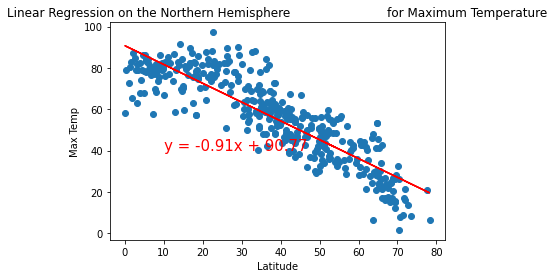

In [51]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

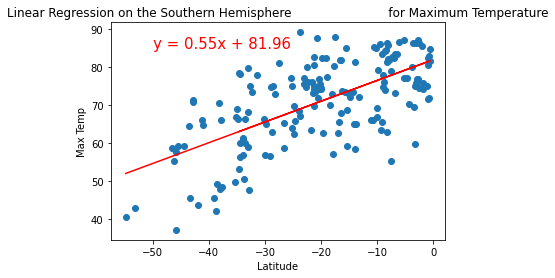

In [52]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,85))

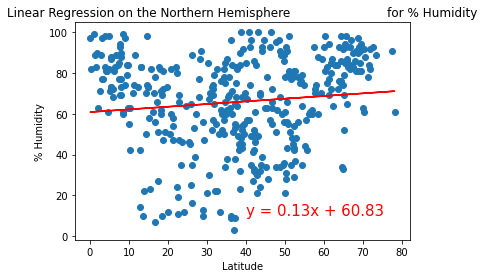

In [53]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

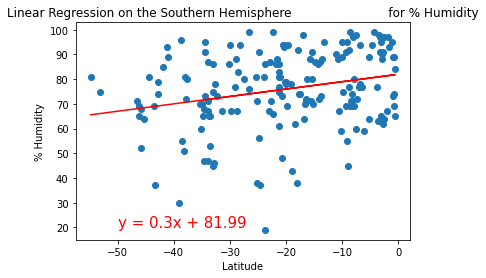

In [54]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,20))

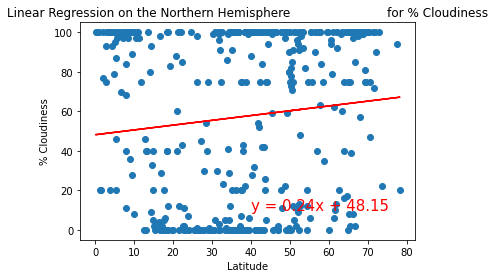

In [55]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

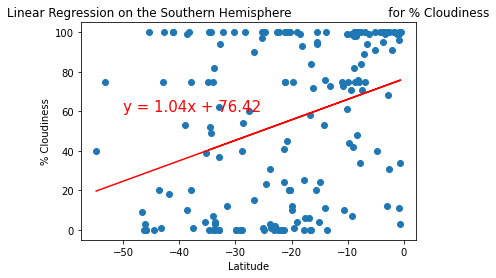

In [56]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

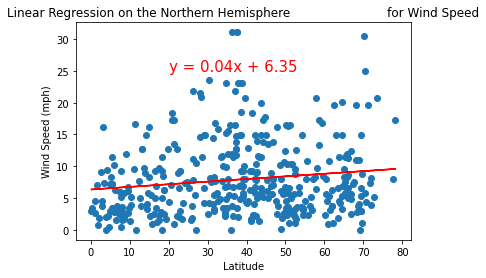

In [62]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed (mph)',(20,25))

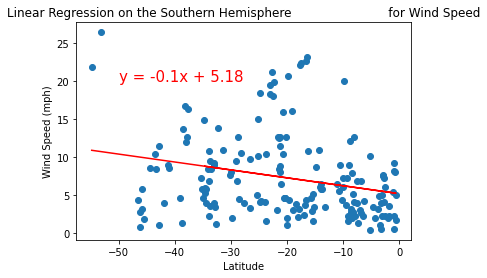

In [70]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed (mph)',(-50,20))